In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, average_precision_score
from sklearn.preprocessing import normalize, MinMaxScaler
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder
sns.set_style("white")
sns.set_context("poster")

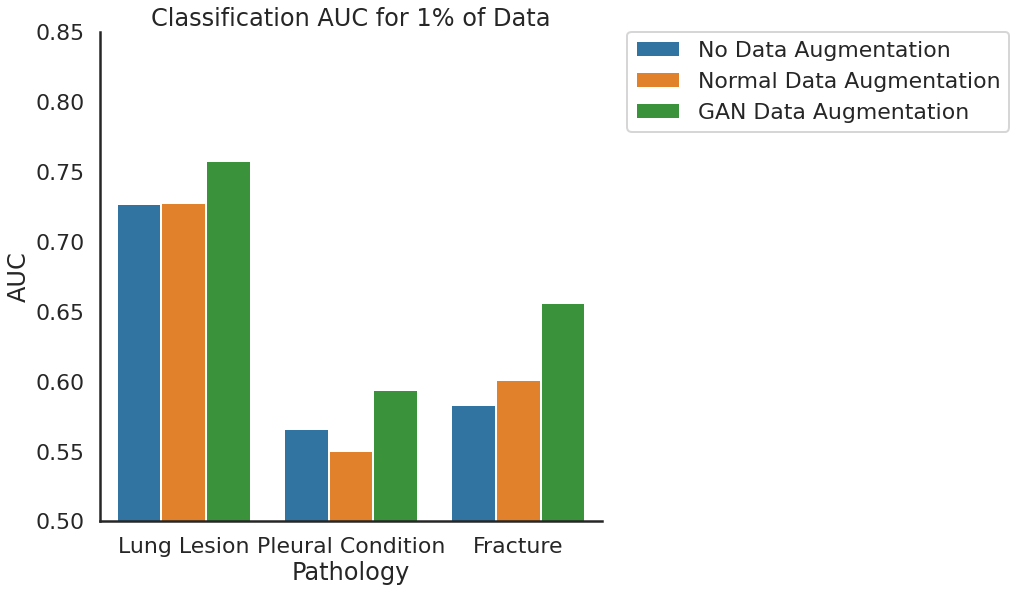

<Figure size 432x288 with 0 Axes>

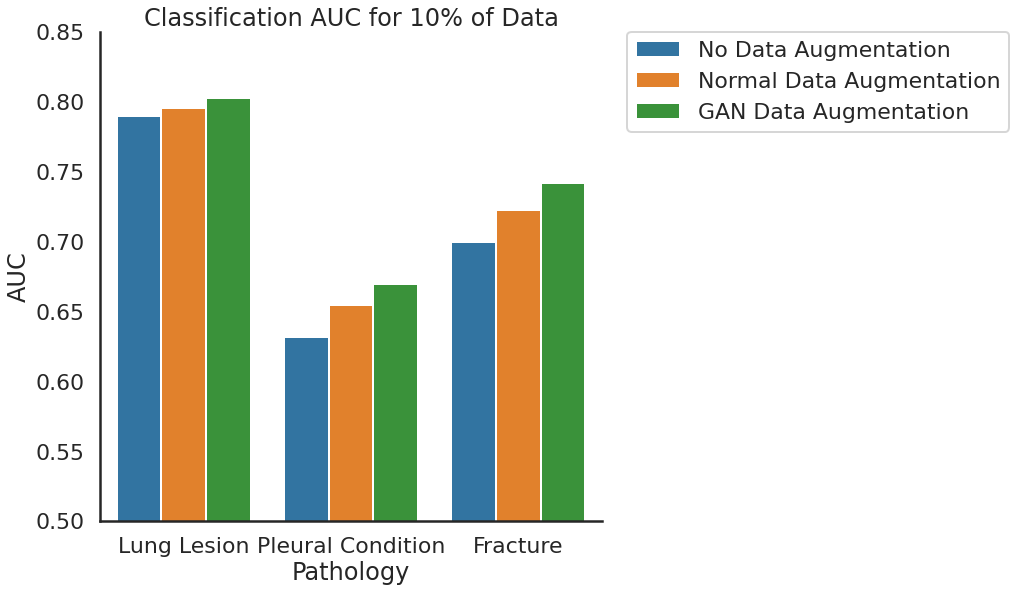

<Figure size 432x288 with 0 Axes>

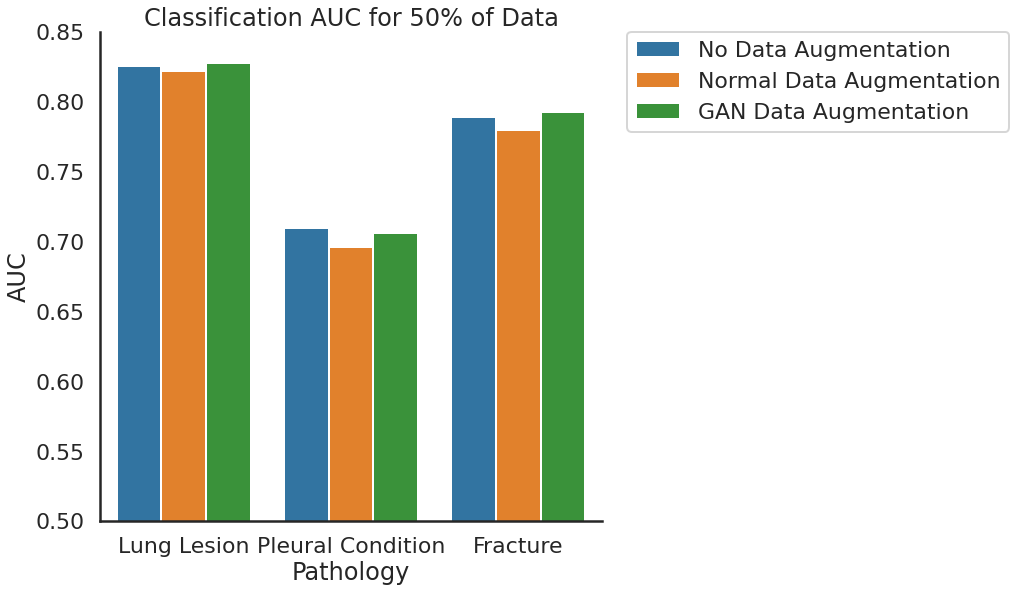

<Figure size 432x288 with 0 Axes>

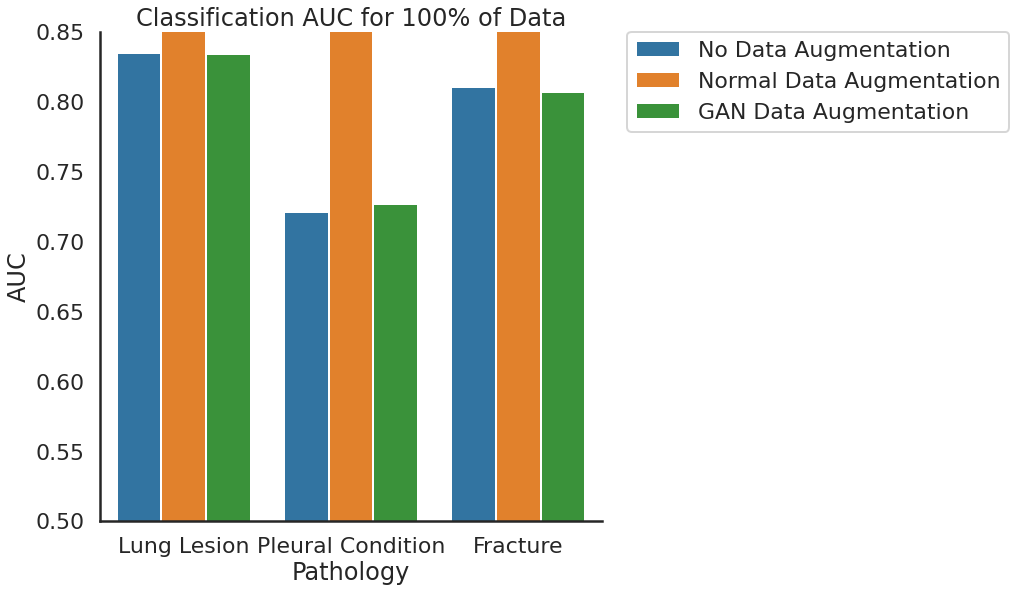

<Figure size 432x288 with 0 Axes>

In [54]:
AUC_1=[
            [0.727,0.728,0.758],
            [0.566,0.550,0.594],
            [0.583,0.601,0.656]
      ]

AUC_10=[
            [0.790,0.796,0.803],
            [0.632,0.655,0.670],
            [0.700,0.723,0.742]
        ]
AUC_50=[
            [0.826,0.822,0.828],
            [0.710,0.696,0.706],
            [0.789,0.780,0.793]
        ]
AUC_100=[
            [0.835,1,0.834],
            [0.721,1,0.727],
            [0.811,1,0.807]
        ]

def graph(array,dataset_split):
    columns=['No Data Augmentation','Normal Data Augmentation','GAN Data Augmentation']
    labels=['Lung Lesion','Pleural Condition','Fracture']
    df=pd.DataFrame(array,columns=columns)
    df['labels']=labels
    df=pd.melt(df, id_vars=['labels'], value_vars=columns, var_name='data_aug', value_name='AUC')
    df['dataset_split']=dataset_split
    plt.figure(figsize=(9,9))
    ax = sns.barplot(x='labels',y='AUC',hue='data_aug',data=df)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title("Classification AUC for {}% of Data".format(dataset_split))
    plt.xlabel("Pathology")
    plt.ylim(0.50,0.85)
    sns.despine()
    plt.show()
    plt.clf()
    return df
AUC_1_df=graph(AUC_1,1)
AUC_10_df=graph(AUC_10,10)
AUC_50_df=graph(AUC_50,50)
AUC_100_df=graph(AUC_100,100)

              labels                  data_aug    AUC  dataset_split
0        Lung Lesion      No Data Augmentation  0.790             10
1  Pleural Condition      No Data Augmentation  0.632             10
2           Fracture      No Data Augmentation  0.700             10
3        Lung Lesion  Normal Data Augmentation  0.000             10
4  Pleural Condition  Normal Data Augmentation  0.000             10
5           Fracture  Normal Data Augmentation  0.000             10
6        Lung Lesion     GAN Data Augmentation  0.803             10
7  Pleural Condition     GAN Data Augmentation  0.670             10
8           Fracture     GAN Data Augmentation  0.742             10
0        Lung Lesion      No Data Augmentation  0.826             50
1  Pleural Condition      No Data Augmentation  0.710             50
2           Fracture      No Data Augmentation  0.789             50
3        Lung Lesion  Normal Data Augmentation  0.000             50
4  Pleural Condition  Normal Data 

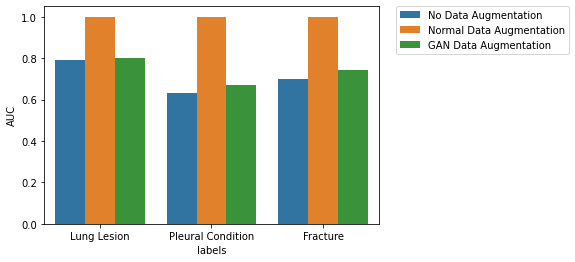

In [33]:
#all_auc=pd.concat([AUC_10_df,AUC_50_df,AUC_100_df])
print(all_auc)
